# 1. 손글씨 인식 모델 만들기

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
digits = load_digits()

x_data = digits['data']
y_data = digits['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


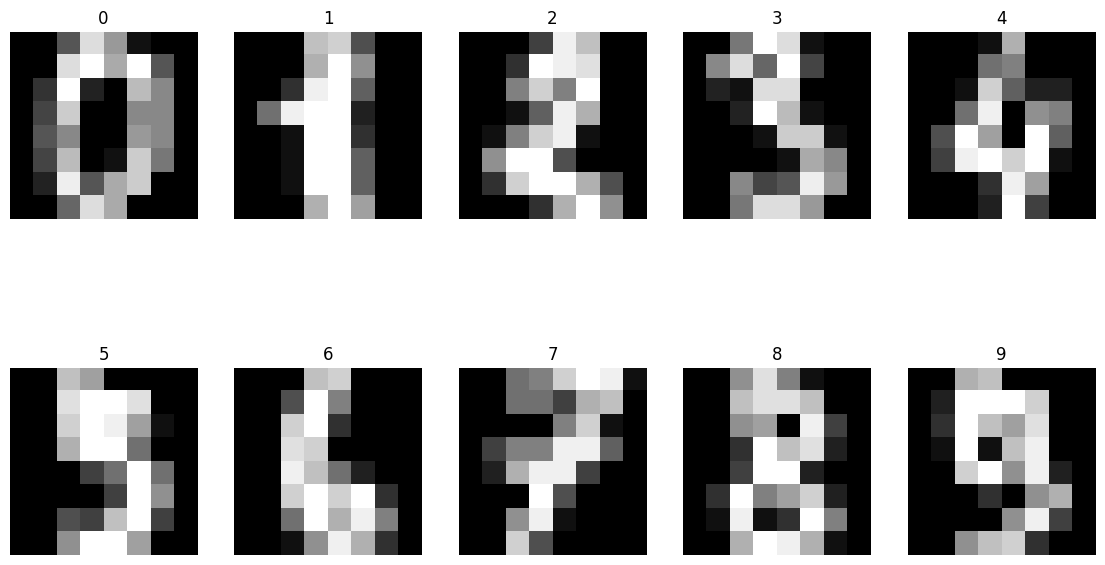

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14,8))



# 데이터를 한줄로 만들어줌 flatten()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_data[i].reshape((8,8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [7]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)

print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [8]:
y_one_hot = nn.functional.one_hot(y_data, num_classes=10).float()
y_one_hot[:10]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437, 10])
torch.Size([360, 64]) torch.Size([360, 10])


# 2. 데이터 로더
* 데이터의 양이 많을 때 배치 단위로 학습하는 방법
![](https://i.imgur.com/t83RUtL.png)

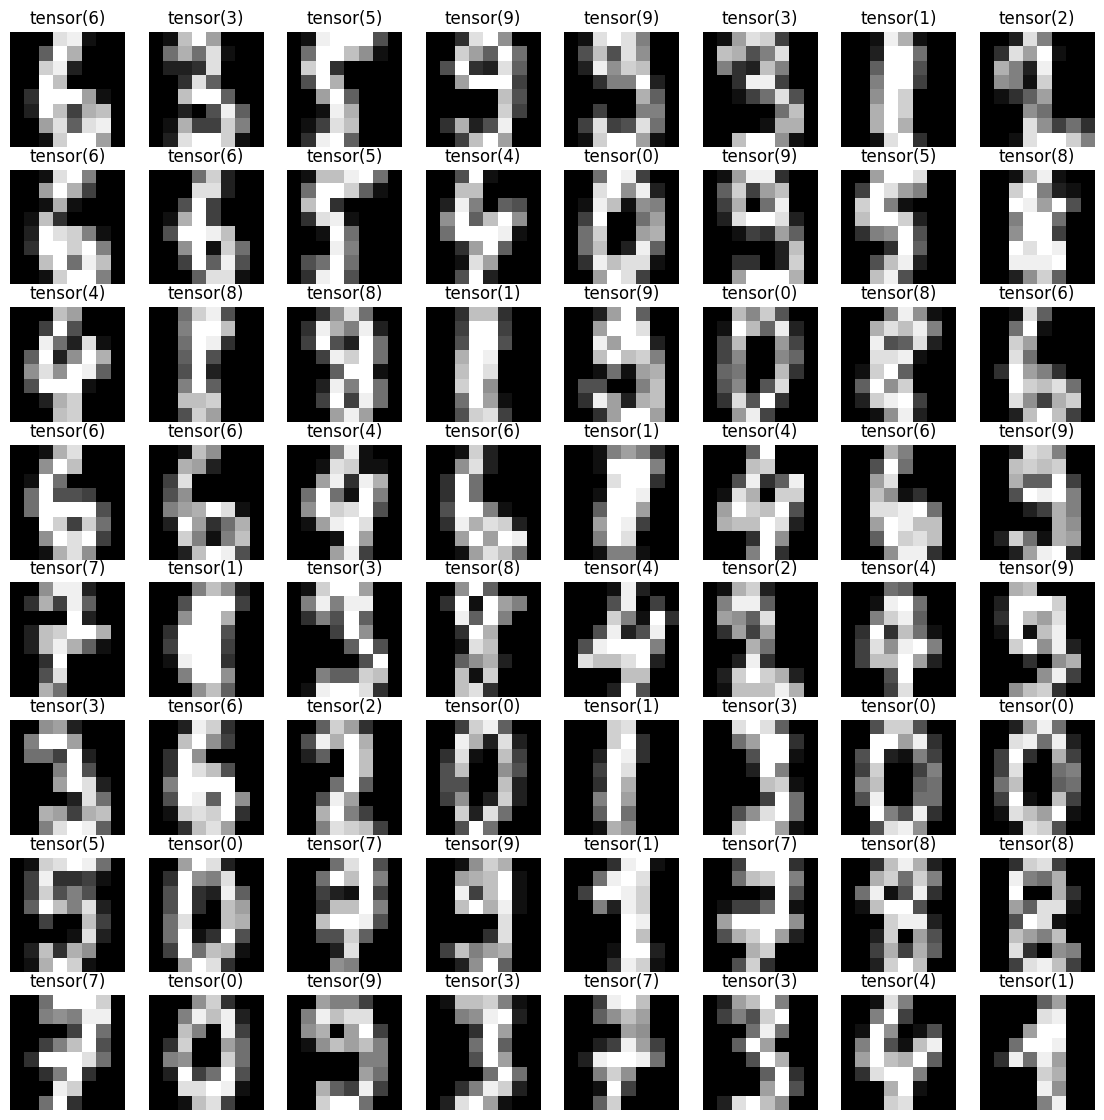

In [13]:
loader = torch.utils.data.DataLoader(
    dataset=list(zip(x_train, y_train)),
    batch_size=64,
    shuffle=True
)
# iter(): next와 함께 사용,
imgs, labels = next(iter(loader))

# batch_size 64이기 때문에 8*8로 설정
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14,14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8,8)), cmap='gray')
    ax.set_title(str(torch.argmax(label)))
    ax.axis('off')

In [21]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 50

for epoch in range(epochs + 1):
    sum_losses=0
    sum_accs=0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        # 배치 단위 정확도 저장
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_batch_index = torch.argmax(y_batch, axis=1)
        acc = (y_batch_index == y_pred_index).float().sum() / len(y_batch) * 100

        sum_accs= sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)

    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy:{avg_acc:.2f}%')

Epoch    0/50 Loss: 1.685935 Accuracy:60.31%
Epoch    1/50 Loss: 0.266226 Accuracy:91.68%
Epoch    2/50 Loss: 0.191552 Accuracy:93.07%
Epoch    3/50 Loss: 0.128477 Accuracy:95.77%
Epoch    4/50 Loss: 0.121839 Accuracy:96.05%
Epoch    5/50 Loss: 0.097617 Accuracy:96.88%
Epoch    6/50 Loss: 0.082523 Accuracy:97.68%
Epoch    7/50 Loss: 0.077726 Accuracy:97.49%
Epoch    8/50 Loss: 0.063273 Accuracy:98.02%
Epoch    9/50 Loss: 0.063595 Accuracy:98.51%
Epoch   10/50 Loss: 0.055499 Accuracy:98.91%
Epoch   11/50 Loss: 0.068702 Accuracy:97.78%
Epoch   12/50 Loss: 0.064261 Accuracy:97.88%
Epoch   13/50 Loss: 0.059686 Accuracy:97.89%
Epoch   14/50 Loss: 0.046716 Accuracy:98.85%
Epoch   15/50 Loss: 0.037238 Accuracy:99.10%
Epoch   16/50 Loss: 0.040399 Accuracy:98.95%
Epoch   17/50 Loss: 0.043080 Accuracy:98.57%
Epoch   18/50 Loss: 0.036177 Accuracy:99.25%
Epoch   19/50 Loss: 0.041098 Accuracy:98.76%
Epoch   20/50 Loss: 0.048860 Accuracy:98.02%
Epoch   21/50 Loss: 0.026043 Accuracy:99.80%
Epoch   22

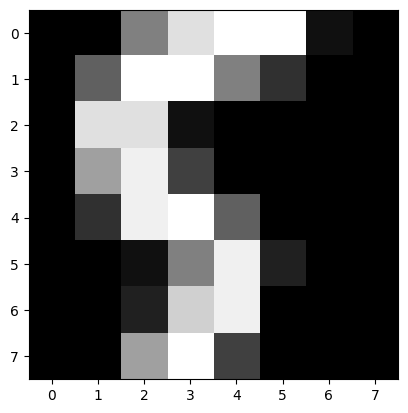

In [22]:
plt.imshow(x_test[0].reshape((8, 8)), cmap='gray')

In [23]:
y_pred = model(x_test)
y_pred[0]

tensor([ 2.2107, -2.7412, -5.3951, -1.3627, -2.6763, 15.4692, -2.6378,  0.0484,
        -1.4310, -4.2123], grad_fn=<SelectBackward0>)

In [24]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[0]

tensor([1.7453e-06, 1.2340e-08, 8.6838e-10, 4.8975e-08, 1.3167e-08, 1.0000e+00,
        1.3684e-08, 2.0082e-07, 4.5744e-08, 2.8341e-09],
       grad_fn=<SelectBackward0>)

In [25]:
for i in range(10):
    print(f'숫자 {i}일 확률:{y_prob[0][i]:.2f}')

숫자 0일 확률:0.00
숫자 1일 확률:0.00
숫자 2일 확률:0.00
숫자 3일 확률:0.00
숫자 4일 확률:0.00
숫자 5일 확률:1.00
숫자 6일 확률:0.00
숫자 7일 확률:0.00
숫자 8일 확률:0.00
숫자 9일 확률:0.00


In [26]:
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)
accuracy = (y_test_index == y_pred_index).float().sum() / len(y_test_index) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다!')

테스트 정확도는 96.11% 입니다!
